### Analizando la Rotación de Clientes en Telecomunicaciones

Requisitos:

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

### About Dataset
Context


"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd
path = r'..\..\..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Limpieza de datos con Python
Identificar y solucionar cualquier valor duplicado.

In [2]:
df.duplicated().sum()

0

No existen valores duplicados

Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [5]:
import numpy as np
# Reemplazar los valores vacíos o con espacios por NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convertir la columna a tipo numérico (float)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Convertir la columna 'SeniorCitizen' a tipo booleano
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)
# Cambiar todas las columnas de tipo 'object' a 'string'
df = df.astype({col: 'string' for col in df.select_dtypes(include='object').columns})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   gender            7043 non-null   string 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   string 
 4   Dependents        7043 non-null   string 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   string 
 7   MultipleLines     7043 non-null   string 
 8   InternetService   7043 non-null   string 
 9   OnlineSecurity    7043 non-null   string 
 10  OnlineBackup      7043 non-null   string 
 11  DeviceProtection  7043 non-null   string 
 12  TechSupport       7043 non-null   string 
 13  StreamingTV       7043 non-null   string 
 14  StreamingMovies   7043 non-null   string 
 15  Contract          7043 non-null   string 
 16  PaperlessBilling  7043 non-null   string 


Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [6]:
# Lista de columnas categóricas a revisar
categorical_cols = df.select_dtypes(include='string').columns.tolist()
# Normalizar las columnas categóricas a minúsculas y eliminar espacios adicionales
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)
# Fuente codigo : https://github.com/iair/mitic-data-science-team-1-septiembre-2024/tree/main


Valores únicos en la columna 'customerID':
['7590-vhveg', '5575-gnvde', '3668-qpybk', '7795-cfocw', '9237-hqitu', '9305-cdskc', '1452-kiovk', '6713-okomc', '7892-pookp', '6388-tabgu', '9763-grskd', '7469-lkbci', '8091-ttvax', '0280-xjgex', '5129-jlpis', '3655-snqyz', '8191-xwszg', '9959-wofkt', '4190-mfluw', '4183-myfrb', '8779-qrdmv', '1680-vdcww', '1066-jksgk', '3638-weabw', '6322-hrpfa', '6865-jznko', '6467-chfzw', '8665-utdhz', '5248-ygijn', '8773-hhuoz', '3841-nfecx', '4929-xihvw', '6827-ieauq', '7310-egvhz', '3413-bmnze', '6234-raapl', '6047-yhpvi', '6572-adkrs', '5380-wjkov', '8168-uqwwf', '8865-tnmnx', '9489-dedvp', '9867-jczsp', '4671-vjlcl', '4080-iiard', '3714-ntnfo', '5948-ujzlf', '7760-oypdy', '7639-liayi', '2954-pibko', '8012-soudq', '9420-lojkx', '6575-suvoi', '7495-ookfy', '4667-qonea', '1658-bygoy', '8769-kktph', '5067-xjqfu', '3957-sqxml', '5954-bdfsg', '0434-csfon', '1215-figmp', '0526-sxdjp', '0557-askvu', '5698-bqjoh', '5122-cyfxa', '8627-zygsz', '3410-yoqbq', '31

Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [7]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)
### Fuente codigo: https://github.com/iair/mitic-data-science-team-1-septiembre-2024/blob/main/clases/ds-fundamentals/pruebas-resueltas/ds_salaries.ipynb

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


Como los valores faltantes son tan pocos. Podemos eliminarlos del dataset.


In [8]:
df = df.dropna()
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
customerID,7032,0,0.0
DeviceProtection,7032,0,0.0
TotalCharges,7032,0,0.0
MonthlyCharges,7032,0,0.0
PaymentMethod,7032,0,0.0
PaperlessBilling,7032,0,0.0
Contract,7032,0,0.0
StreamingMovies,7032,0,0.0
StreamingTV,7032,0,0.0
TechSupport,7032,0,0.0


Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [9]:
# Identificar filas con valores negativos
numeric_cols = ['MonthlyCharges', 'TotalCharges','tenure']
negative_sales = df[numeric_cols] < 0
num_negative_sales = negative_sales.sum().sum()
print(f"Número total de valores negativos: {num_negative_sales}")

Número total de valores negativos: 0


In [10]:
df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [11]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### Exploración de datos con Python:
Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

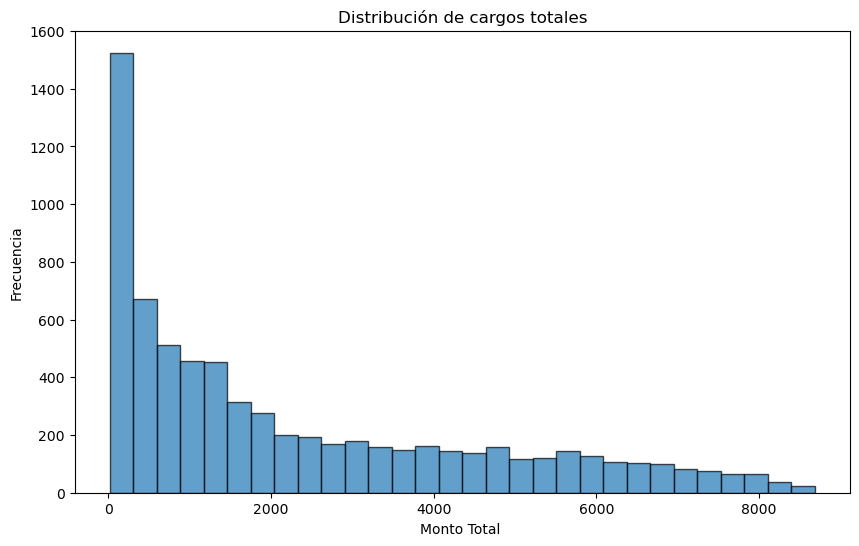

In [16]:
import matplotlib.pyplot as plt

# Histograma de las Cargos totales
plt.figure(figsize=(10, 6))
plt.hist(df['TotalCharges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de cargos totales')
plt.xlabel('Monto Total ')
plt.ylabel('Frecuencia')
plt.show()


La Distribucion de cargos totales indica que la mayoria tiene cargos totales  bajos, y una poca cantidad tiene cargos totales muy altos como de 8000.

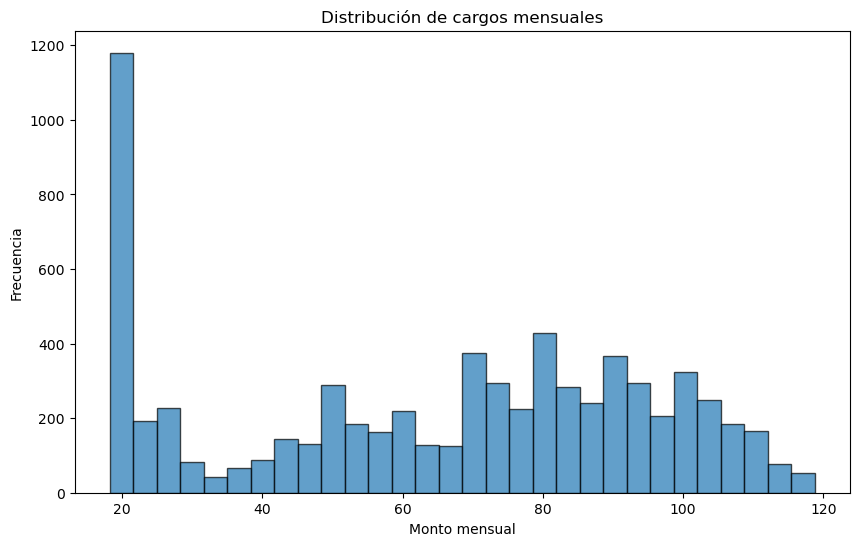

In [17]:
# Histograma de las Cargos mensuales
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyCharges'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de cargos mensuales')
plt.xlabel('Monto mensual')
plt.ylabel('Frecuencia')
plt.show()

La distribucion de cargos mensuales muestra una concentracion alta de cliente que pagan 20 al mes. Para cargos mensuales entre $30 y $120, la distribución es más dispersa y relativamente equilibrada. 

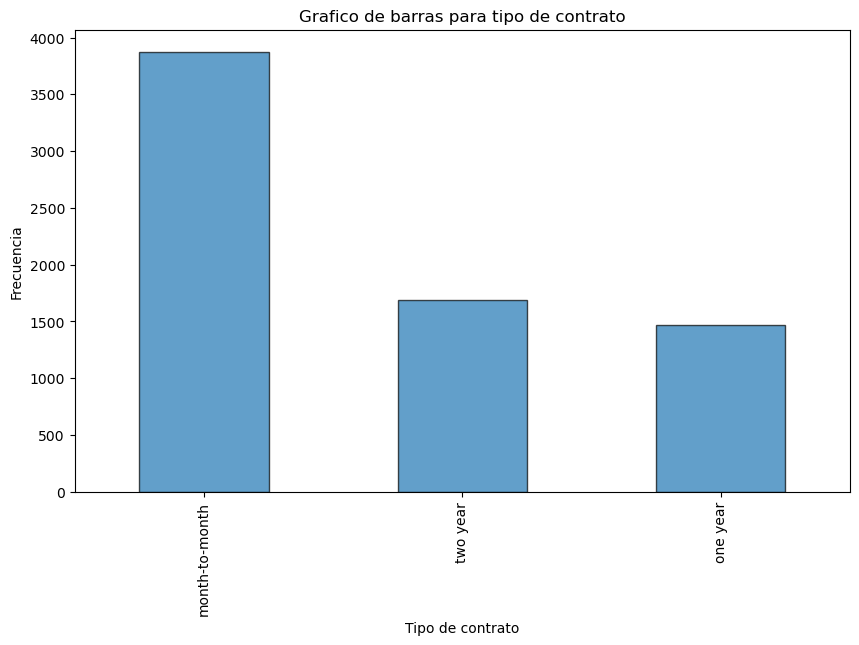

In [36]:
# Gráfico de barras para la distribución del tipo de contrato
plt.figure(figsize=(10, 6))
df['Contract'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Grafico de barras para tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Frecuencia')
plt.show()


Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

El grafico de barras para tipo de contrato muestra que la mayoria de los clientes tienen contratos mes a mes, miesntras que los contratos de 1 o 2 años tienen menos clientes. 

In [18]:
import plotly.express as px

# Crear el boxplot
fig = px.box(df, x='Contract', y='TotalCharges', title='Boxplot de Cargos totales por Contrato')
# Mostrar la figura
fig.show()

El boxplot de cargos totales por contrato muestra que Los clientes con contratos "month-to-month" tienen cargos totales más bajos en promedio, pero también presentan una mayor variabilidad en sus cargos.
Se observa una mayor concentración de outliers (puntos fuera del bigote superior), lo que indica que algunos clientes con este tipo de contrato han acumulado cargos significativamente altos. Esto puede deberse a clientes que han estado durante mucho tiempo con el servicio o que han contratado múltiples servicios adicionales. Los clientes con contratos de un año y dos tienen cargos totales más altos en promedio, hay menos variabilidad.

In [15]:
import plotly.express as px

# Crear el boxplot
fig = px.box(df, x='Contract', y='MonthlyCharges', title='Boxplot de cargos mensuales por Contrato')
# Mostrar la figura
fig.show()

* Contratos "month-to-month":

Los clientes con contratos "month-to-month" tienen una mayor variabilidad en sus cargos mensuales. Esto es esperado ya que estos contratos suelen ser más flexibles, permitiendo a los clientes ajustar su plan o servicios más frecuentemente.
La mediana de los cargos mensuales para estos contratos está en torno a $70, lo cual es un valor ligeramente inferior al de los contratos a largo plazo.
* Contratos de un año:

Los clientes con contratos de un año tienen cargos mensuales algo más elevados y también más consistentes.
La mediana se encuentra cerca de los $80, lo que indica que los clientes que optan por contratos podría sugerir que estos clientes contratan más servicios o paquetes adicionales.
* Contratos de dos años:

Los clientes con contratos de dos años tienen una distribución similar a los de un año, con la mediana también alrededor de $80.
La variabilidad en los cargos es similar a los contratos de un año, lo que sugiere que estos clientes tienden a optar por paquetes y servicios similares a los de contratos de un año, pero están más dispuestos a comprometerse por más tiempo.

In [44]:
# Crear una columna que cuente el número de servicios adicionales, excluyendo los que tienen 'no internet service'
df['num_servicios_adicionales'] = (
    ((df['OnlineSecurity'] == 'yes') & (df['OnlineSecurity'] != 'no internet service')).astype(int) +
    ((df['OnlineBackup'] == 'yes') & (df['OnlineBackup'] != 'no internet service')).astype(int) +
    ((df['DeviceProtection'] == 'yes') & (df['DeviceProtection'] != 'no internet service')).astype(int) +
    ((df['TechSupport'] == 'yes') & (df['TechSupport'] != 'no internet service')).astype(int) +
    ((df['StreamingTV'] == 'yes') & (df['StreamingTV'] != 'no internet service')).astype(int) +
    ((df['StreamingMovies'] == 'yes') & (df['StreamingMovies'] != 'no internet service')).astype(int)
)




Los clientes con más servicios adicionales claramente tienen cargos totales más altos, lo que refuerza la idea de que el número de servicios adicionales es un fuerte determinante de los costos totales.

In [45]:
# Calcular el promedio de servicios adicionales por tipo de contrato
promedio_servicios = df.groupby('Contract')['num_servicios_adicionales'].mean()


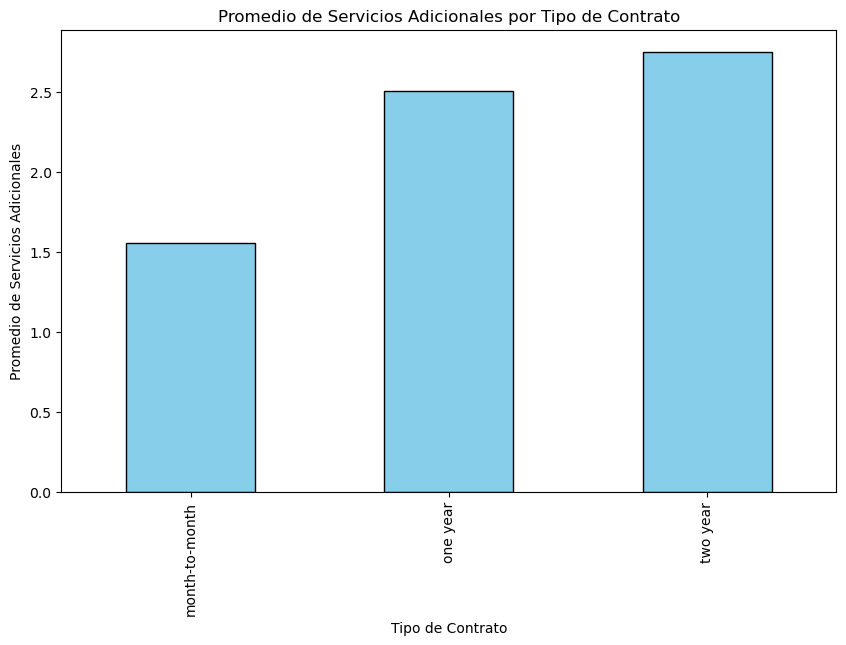

In [38]:
# Graficar el promedio de servicios adicionales por tipo de contrato
promedio_servicios.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Promedio de Servicios Adicionales por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Promedio de Servicios Adicionales')
plt.show()


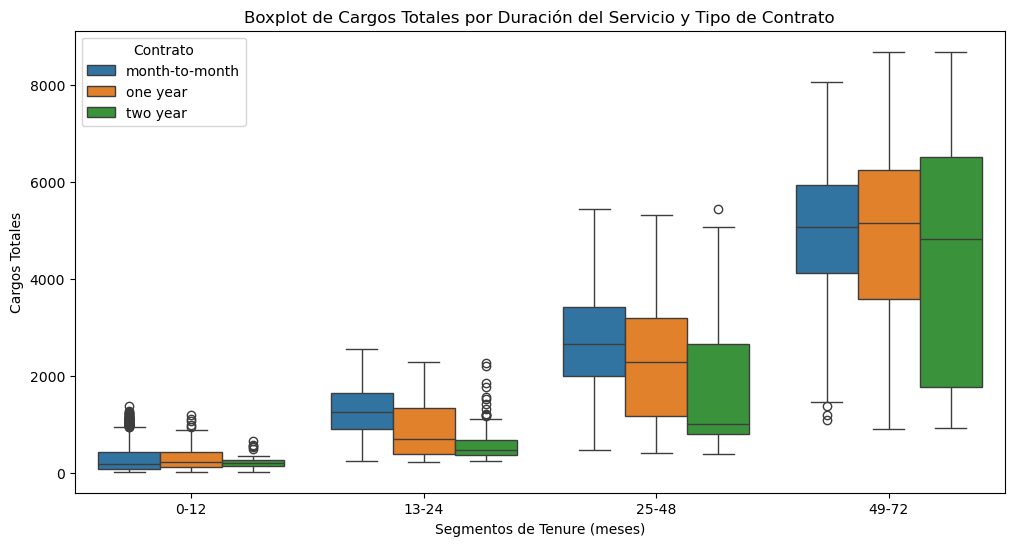

In [43]:
# Crear categorías de tenure en segmentos
df['tenure_segment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])

# Graficar un boxplot de cargos totales agrupado por segmentos de tenure y tipo de contrato
plt.figure(figsize=(12, 6))
sns.boxplot(x='tenure_segment', y='TotalCharges', hue='Contract', data=df, showfliers=True)
plt.title('Boxplot de Cargos Totales por Duración del Servicio y Tipo de Contrato')
plt.xlabel('Segmentos de Tenure (meses)')
plt.ylabel('Cargos Totales')
plt.legend(title='Contrato')
plt.show()


* Los outliers en los contratos "month-to-month" en los primeros 12 meses pueden deberse a clientes que acumulan cargos altos rápidamente debido a la naturaleza flexible de estos contratos, que permite una rápida variación en los servicios contratados.
* La mayor variabilidad y la presencia de outliers también se explican por la posibilidad de que los clientes en contratos "month-to-month" contraten más servicios adicionales de manera flexible, lo que genera fluctuaciones más marcadas en los cargos totales.